<img src="images/cads-logo.png" style="height: 100px;" align=left> 
<img src="images/jds.png" style="height: 100px;" align=right> 

# JDS Capstone

You have been provided with information about the customers' historical purchase as the amount of money spent, Number of inactive months and so on. Two columns `Potential_Customer` and `Cust_Last_Purchase` represent the customers' respond to the latest promotion. The column `Potential_Customer` represents if the customer purchased any product, and the column `Cust_Last_Purchase` represents the amount of this purchase and it is `Nan` if there has been no purchase.

## Data description
- Below is the description of each feature available in the dataset.
<img src="images/MicrosoftTeams-image.png" style="height: 700px">

## Objective
**Design a predictive model to determine the potential customers.** The target variable is `Potential_Customer`. 

**Attention:** Because the column `Cust_Last_Purchase` relates to the target variable `Potential_Customer`, you need to exclude it from your model.

## Submission Guideline

Perform the following:

1. Create a team (2-3 people)
2. Perform the following:
    1. **Data Wrangling - Cleaning & Merging**: Check and handle the existance of missing values, the type of variables, or integrity of data
    2. **Exploratory Data Analysis**: Analyze data to summarize their main characteristics
    3. **Feature Engineering**: Make new features or change the current features
    4. **Feature Selection**: Choose the best features
    5. **Data Pre-Processing**: Make data usable for applying ML algorithms. 
    6. **Model Design**: Create several predictive models and tune the hyperparameters
    7. **Model Evaluation**: Compare the performance of the models
    8. **Bonus**: Any creative idea for improving machine learning models

The output expected at the end of this capstone is:
1. One **Jupyter notebook** containing all analysis performed using Python.
2. One **PowerPoint** presentation containing the analysis results. Each group will be allocated 15-20 minutes (inclusive of Q&A) to present their analysis results to the class. 

**One zip file per group** is to be uploaded on **GDrive** by the **time** that will be given to you by the trainer, including the **jupyter notebook(s)** and the **powerpoint presentation** indicating the **names of all group members**.

## Presentation Guideline

**Note(s):**
1. Only **one submission** is required per group.
2. Include full details in your notebook and **report only important results** in your presentation.
3. Please only use Jupyter notebook (pandas) to clean the data (Do not clean manually using Excel)

# Table of Content

- [JDS Capstone](#JDS-Capstone)
- [Data description](#Data-description)
- [Objective](#Objective)
- [Submission Guideline](#Submission-Guideline)
- [Presentation Guideline](#Presentation-Guideline)
- [Table of Content](#Table-of-Content)
- [0. Import necessary Packages](#-<font-color=green-0.-Import-necessary-Packages<font>)
- [1. Load the Data into Pandas Dataframe](#<font-color=green-1.-Load-the-Data-into-Pandas-Dataframe<font>)
- [2. Data Cleaning](#<font-color=green2.-Data-Cleaning<font>)
    - [2.1 How big is the dataset? (number of rows, features and total datapoints)](#2.1-How-big-is-the-dataset?-(number-of-rows,-features-and-total-datapoints))
    - [2.2 What is the type of each column?](#2.2-What-is-the-type-of-each-column?)
        - [2.2.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`? Fix the type of the columns as it should be.](#2.2.1-Why-columns-such-as-`Cust_Last_Purchase`-are-`object`-while-they-should-be-`float64`?-Fix-the-type-of-the-columns-as-it-should-be.)
    - [2.3 Check data for duplicate rows and remove the duplicates](#2.3-Check-data-for-duplicate-rows-and-remove-the-duplicates)
    - [2.4 Do we need `C_ID` in our analysis? Drop the columns you will not use in your analysis, if there is any.](#2.4-Do-we-need-`C_ID`-in-our-analysis?-Drop-the-columns-you-will-not-use-in-your-analysis,-if-there-is-any.)
- [3. Exploratory Data Analysis (EDA)](#<font-color=green3.-Exploratory-Data-Analysis-(EDA)<font>)
    - [3.1 Explore Categorical Variables](#3.1-Explore-Categorical-Variables)
        - [3.1.1 Insight](#3.1.1-Insight)
        - [3.1.2 Solution](#3.1.2-Solution)
    - [3.2 Explore Relationship Between Categorical & Target Variable. Interpret the observation](#3.2-Explore-Relationship-Between-Categorical-&-Target-Variable.-Interpret-the-observation)
        - [3.2.1. Insight](#3.2.1.-Insight)
    - [3.3 Explore Numerical Variables](#3.3-Explore-Numerical-Variables)
        - [3.3.1 Insight](#3.3.1-Insight)
        - [3.3.2 Check the Data for Missing Values](#3.3.2-Check-the-Data-for-Missing-Values)
    - [3.4 Explore the Relationship between Numerical Variables & Target Variable. Interpret your observation](#3.4-Explore-the-Relationship-between-Numerical-Variables-&-Target-Variable.-Interpret-your-observation)
    - [3.5 Explore the Relationship between the columns and try to answer the following questions:](#3.5-Explore-the-Relationship-between-the-columns-and-try-to-answer-the-following-questions:)
- [4. Feature Enginearing](#<font-color=green4.-Feature-Enginearing<font)
    - [4.1 Add Some High Level Features and explore their relationship with the target variable](#4.1-Add-Some-High-Level-Features-and-explore-their-relationship-with-the-target-variable)
    - [4.2 Check Correlation between Numerical Variables](#4.2-Check-Correlation-between-Numerical-Variables)
- [5. Feature Selection](#<font-color=green5.-Feature-Selection<font)
- [6. Data PreProcessing](#<font-color=green6.-Data-PreProcessing<font)
    - [6.1 Separate X (features) and y (target)](#6.1-Separate-X-(features)-and-y-(target))
    - [6.2 Dummy Variables](#6.2-Dummy-Variables)
    - [6.3 Split data to train/test](#6.3-Split-data-to-train/test)
    - [6.4 Feature Scaling](#6.4-Feature-Scaling)
    - [6.5 PCA on Numerical Columns only](#6.5-PCA-on-Numerical-Columns-only)
- [7. Machine Learning](#<font-color=green7.-Machine-Learning<font)

#  <font color=green> 0. Import necessary Packages<font>

In [ ]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics.scorer import SCORERS, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# <font color=green> 1. Load the Data into Pandas Dataframe<font>

In [ ]:
# Connect to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the data into data dataframe
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSource/Capstone/data.csv')

In [ ]:
# View first 5 rows of dataframe
data.head().T

,0,1,2,3,4
Potential_Customer,1,1,0,1,1
C_ID,9946,87939,88003,188721,88056
Cust_Last_Purchase,$5.00,$30.00,NaN,$20.00,$5.00
Pur_3_years,2,1,5,1,3
Pur_5_years,17,7,12,11,15
Pur_3_years_Indirect,2,0,3,0,2
Pur_5_years_Indirect,4,3,5,3,7
Pur_latest,$0.00,$25.00,$15.00,$20.00,$3.00
Pur_3_years_Avg,$7.50,$25.00,$15.00,$20.00,$4.33
Pur_5_years_Avg,$7.76,$13.00,$11.25,$12.45,$3.80


In [ ]:
# View your data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Potential_Customer,4469.0,0.480868,0.499690,0.0,0.0,0.0,1.0,1.0
C_ID,4469.0,73837.719848,36156.968605,12.0,52713.0,75790.0,93705.0,191672.0
Pur_3_years,4469.0,3.297158,2.207326,0.0,2.0,3.0,4.0,15.0
Pur_5_years,4469.0,11.006042,9.459082,1.0,4.0,9.0,15.0,91.0
Pur_3_years_Indirect,4469.0,1.897516,1.629178,0.0,1.0,2.0,3.0,9.0
Pur_5_years_Indirect,4469.0,5.867756,4.939174,0.0,2.0,4.0,9.0,41.0
InAct_Last,4469.0,17.923697,4.130671,4.0,16.0,18.0,20.0,27.0
InAct_First,4469.0,73.605952,38.094688,15.0,40.0,74.0,111.0,260.0
Ad_Res_1_year,4469.0,13.070038,4.991064,3.0,11.0,12.0,13.0,49.0
Ad_Res_3_Year,4469.0,29.631237,7.787209,5.0,26.0,31.0,34.0,71.0


# <font color=green>2. Data Cleaning<font>
Checking the existance of missing values, the type of variables, or integrity of data. 

## 2.1 How big is the dataset? (number of rows, features and total datapoints)

In [ ]:
print('Data shape:', data.shape)
print('Row:\t', len(data)) # OR data.index / data.values
print('Columns:',len(data.columns))
print('Datapoints:', len(data) * len(data.columns))

Data shape: (4469, 25)
Row:	 4469
Columns: 25
Datapoints: 111725


## 2.2 What is the type of each column?

In [ ]:
data.dtypes

Potential_Customer            int64
C_ID                          int64
Cust_Last_Purchase           object
Pur_3_years                   int64
Pur_5_years                   int64
Pur_3_years_Indirect          int64
Pur_5_years_Indirect          int64
Pur_latest                   object
Pur_3_years_Avg              object
Pur_5_years_Avg              object
Pur_3_years_Avg_Indirect     object
InAct_Last                    int64
InAct_First                   int64
Ad_Res_1_year                 int64
Ad_Res_3_Year                 int64
Ad_Res_5_Year                 int64
Ad_Res_Ind_1_Year             int64
Ad_Res_Ind_3_Year             int64
Ad_Res_Ind_5_Year             int64
Status_Cust                  object
Status_Latest_Ad              int64
Age                         float64
Gender                       object
Cust_Prop                    object
Cust_Ann_Income              object
dtype: object

### 2.2.1 Why columns such as `Cust_Last_Purchase` are `object` while they should be `float64`? Fix the type of the columns as it should be.

**Attention:** Some numerical columns have missing values, Dollar sign, or Comma. You need to fix the issue to be able to convert the column to numerical. 

**Hint:** 
1. The following code can help you to remove an 'OldSign' and replace it with a 'NewSign' or nothing: `df.col=df.col.str.replace('OldSign', 'NewSign')`

2. After removing the signs and replace it with correct sign, or nothing you need to:

    a- Create a list of the name of the categorical columns and the numerical columns:
        `CatCols=[Name of the Categorical columns]`
        `NumCols=list(set(data.columns)-set(CatCols))`
    
    b- Fix the type of the columns
        `data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))`
        `data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))`

In [ ]:
#data[''] = data[''].str.replace('$','') 

data['Cust_Last_Purchase'] = data['Cust_Last_Purchase'].str.replace('$','') 
data['Pur_latest'] = data['Pur_latest'].str.replace('$','') 
data['Pur_3_years_Avg'] = data['Pur_3_years_Avg'].str.replace('$','') 
data['Pur_5_years_Avg'] = data['Pur_5_years_Avg'].str.replace('$','') 
data['Pur_3_years_Avg_Indirect'] = data['Pur_3_years_Avg_Indirect'].str.replace('$','') 
data['Cust_Ann_Income'] = data['Cust_Ann_Income'].str.replace('$','') 
data['Cust_Ann_Income'] = data['Cust_Ann_Income'].str.replace(',','') 

In [ ]:
CatCols = ['Potential_Customer', 'C_ID','Status_Cust','Status_Latest_Ad','Gender','Cust_Prop']
NumCols = list(set(data.columns)-set(CatCols))

In [ ]:
data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))
data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))

In [ ]:
# Check for dtypes is category and float

data.dtypes

Potential_Customer          category
C_ID                        category
Cust_Last_Purchase           float64
Pur_3_years                  float64
Pur_5_years                  float64
Pur_3_years_Indirect         float64
Pur_5_years_Indirect         float64
Pur_latest                   float64
Pur_3_years_Avg              float64
Pur_5_years_Avg              float64
Pur_3_years_Avg_Indirect     float64
InAct_Last                   float64
InAct_First                  float64
Ad_Res_1_year                float64
Ad_Res_3_Year                float64
Ad_Res_5_Year                float64
Ad_Res_Ind_1_Year            float64
Ad_Res_Ind_3_Year            float64
Ad_Res_Ind_5_Year            float64
Status_Cust                 category
Status_Latest_Ad            category
Age                          float64
Gender                      category
Cust_Prop                   category
Cust_Ann_Income              float64
dtype: object

## 2.3 Check data for duplicate rows and remove the duplicates

**Hint:**

1. `data.duplicated()` will give you `True` if the row in `data` is duplicate and `False` otherwise.

2. `duplicates.sum()` will tell you how many duplicates you have in `data`.

3. `data=data.drop_duplicates()` will remove the duplicates

In [ ]:
# Drop Duplicates
data = data.drop_duplicates()

In [ ]:
# Check for duplicate

data.duplicated().sum()

0

In [ ]:
len(data)

3618

## 2.4 Do we need `C_ID` in our analysis? Drop the columns you will not use in your analysis, if there is any.

**Hint:** 
1. Drop the useless column(s)
2. Remove the name of the column(s) from `CatCols` or `NumCols`
    Example: CatCols.remove('C_ID')

In [ ]:
# data = data.drop(['C_ID'], axis=1)

In [ ]:
# Remove C_ID from CatCols, but not from data

CatCols.remove('C_ID')

In [ ]:
data.columns

Index(['Potential_Customer', 'C_ID', 'Cust_Last_Purchase', 'Pur_3_years',
       'Pur_5_years', 'Pur_3_years_Indirect', 'Pur_5_years_Indirect',
       'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg',
       'Pur_3_years_Avg_Indirect', 'InAct_Last', 'InAct_First',
       'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year',
       'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_5_Year', 'Status_Cust',
       'Status_Latest_Ad', 'Age', 'Gender', 'Cust_Prop', 'Cust_Ann_Income'],
      dtype='object')

In [ ]:
# No more C_ID in CatCols for EDA

CatCols

['Potential_Customer',
 'Status_Cust',
 'Status_Latest_Ad',
 'Gender',
 'Cust_Prop']

In [ ]:
# But in the data itself still keep C_ID for ML later

data.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,5.0,2.0,17.0,2.0,4.0,0.0,7.50,7.76,7.50,14.0,110.0,32.0,48.0,73.0,3.0,12.0,16.0,A,0,71.0,F,H,65957.0
1,1,87939,30.0,1.0,7.0,0.0,3.0,25.0,25.00,13.00,NaN,18.0,75.0,13.0,35.0,55.0,6.0,6.0,22.0,A,1,7.0,M,U,0.0
2,0,88003,NaN,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.67,19.0,57.0,14.0,35.0,53.0,6.0,17.0,22.0,S,1,79.0,F,U,0.0
3,1,188721,20.0,1.0,11.0,0.0,3.0,20.0,20.00,12.45,NaN,5.0,113.0,17.0,38.0,71.0,8.0,8.0,33.0,A,0,73.0,F,U,76293.0
4,1,88056,5.0,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.00,17.0,118.0,13.0,28.0,63.0,6.0,12.0,24.0,S,1,68.0,F,H,113663.0


# <font color=green>3. Exploratory Data Analysis (EDA)<font>
Checking the relationship betweem variables, summary of data, outliers, filling missing values etc.

## 3.1 Explore Categorical Variables
1. How many categories in each categorical variables?
2. What proportion/percentage from each category?

**Hint:**
For visualization you can use `sns.countplot()` for each categorical variable


In [ ]:
gendermale = [i for i in data['Gender'] if i=='M']
genderfemale = [i for i in data['Gender'] if i=='F']
genderunknown = [i for i in data['Gender'] if i=='U']

print('Male:', len(gendermale))
print('Female:', len(genderfemale))
print('Unknown:', len(genderunknown))

Agerange010 = [i for i in data['Age'] if i >=0 and i<=10]
Agerange1120 = [i for i in data['Age'] if i > 10 and i<=20]
Agerange2130 = [i for i in data['Age'] if i > 20 and i<=30]
Agerange3140 = [i for i in data['Age'] if i > 30 and i<=40]
Agerange4150 = [i for i in data['Age'] if i > 40 and i<=50]
Agerange5160 = [i for i in data['Age'] if i > 50 and i<=60]
Agerange6170 = [i for i in data['Age'] if i > 60 and i<=70]
Agerange7180 = [i for i in data['Age'] if i > 70 and i<=80]
Agerange8190 = [i for i in data['Age'] if i > 80 and i<=90]
Agerange9100 = [i for i in data['Age'] if i > 90 and i<=100]

print('Age 0-10:', len(Agerange010))
print('Age 11-20:', len(Agerange1120))
print('Age 21-30:', len(Agerange2130))
print('Age 31-40:', len(Agerange3140))
print('Age 41-50:', len(Agerange4150))
print('Age 51-60:', len(Agerange5160))
print('Age 61-70:', len(Agerange6170))
print('Age 71-80:', len(Agerange7180))
print('Age 81-90:', len(Agerange8190))
print('Age 91-100:', len(Agerange9100))

print(Agerange010)

Male: 1530
Female: 1922
Unknown: 166
Age 0-10: 19
Age 11-20: 24
Age 21-30: 92
Age 31-40: 294
Age 41-50: 485
Age 51-60: 513
Age 61-70: 514
Age 71-80: 613
Age 81-90: 271
Age 91-100: 0
[7.0, 6.0, 0.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 6.0, 7.0]


In [ ]:
print('==============================\nCategories in each categories\n==============================\n')

for i in CatCols:
  print(i,':',data[i].cat.categories)

Categories in each categories

Potential_Customer : Int64Index([0, 1], dtype='int64')
Status_Cust : Index(['A', 'E', 'F', 'L', 'N', 'S'], dtype='object')
Status_Latest_Ad : Int64Index([0, 1], dtype='int64')
Gender : Index(['F', 'M', 'U'], dtype='object')
Cust_Prop : Index(['H', 'U'], dtype='object')


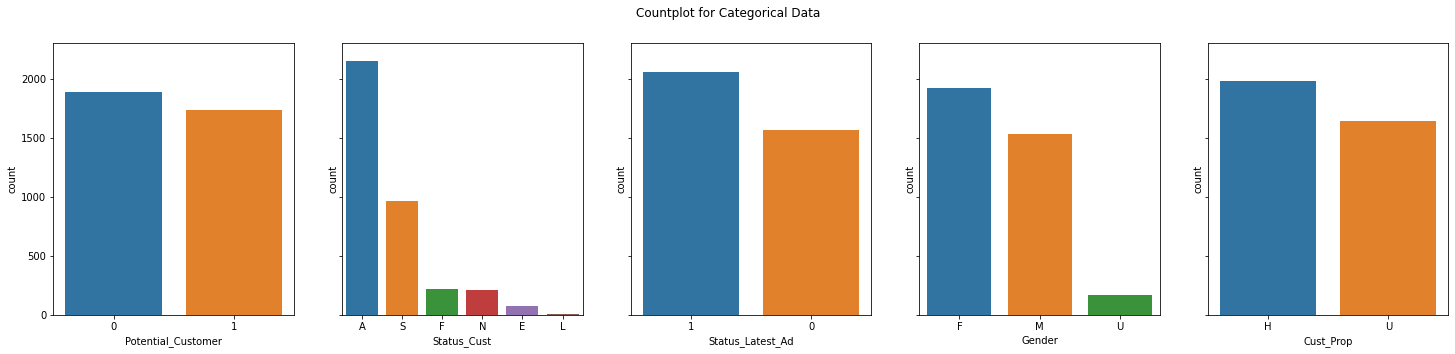

In [ ]:
# Countplot for the categorical columns

fig, ax = plt.subplots(1,5, figsize=(25,5), sharey=True)
plt.ylim(0,2300)

j=0
for i in CatCols:
  sns.countplot(data[i], ax=ax[j], order=data[i].value_counts().index)
  j+=1  
  fig.show()

fig.suptitle('Countplot for Categorical Data')
fig.show()

### 3.1.1 Insight

In [ ]:
print('==============================\nCategories count in each categories\n==============================\n')
for i in CatCols:
  print(data[i].value_counts(),'\n')

Categories count in each categories

0    1882
1    1736
Name: Potential_Customer, dtype: int64 

A    2146
S     964
F     219
N     207
E      72
L      10
Name: Status_Cust, dtype: int64 

1    2057
0    1561
Name: Status_Latest_Ad, dtype: int64 

F    1922
M    1530
U     166
Name: Gender, dtype: int64 

H    1981
U    1637
Name: Cust_Prop, dtype: int64 



In [ ]:
print('===================================\nCategories index in each categories\n===================================\n')
for i in CatCols:
  print(data[i].value_counts().index)

Categories index in each categories

CategoricalIndex([0, 1], categories=[0, 1], ordered=False, dtype='category')
CategoricalIndex(['A', 'S', 'F', 'N', 'E', 'L'], categories=['A', 'E', 'F', 'L', 'N', 'S'], ordered=False, dtype='category')
CategoricalIndex([1, 0], categories=[0, 1], ordered=False, dtype='category')
CategoricalIndex(['F', 'M', 'U'], categories=['F', 'M', 'U'], ordered=False, dtype='category')
CategoricalIndex(['H', 'U'], categories=['H', 'U'], ordered=False, dtype='category')


### 3.1.2 Solution

In [ ]:
print('===================================\nCategories Percentage in each categories\n===================================\n')
for i in CatCols:
  print(data[i].value_counts(normalize=True).mul(100).round(2).astype('str') + '%','\n')

Categories Percentage in each categories

0    52.02%
1    47.98%
Name: Potential_Customer, dtype: object 

A    59.31%
S    26.64%
F     6.05%
N     5.72%
E     1.99%
L     0.28%
Name: Status_Cust, dtype: object 

1    56.85%
0    43.15%
Name: Status_Latest_Ad, dtype: object 

F    53.12%
M    42.29%
U     4.59%
Name: Gender, dtype: object 

H    54.75%
U    45.25%
Name: Cust_Prop, dtype: object 



## 3.2 Explore Relationship Between Categorical & Target Variable. Interpret the observation

**Hint**: 
1. Create list of the categorical features:
    `CatFes=list(set(CatCols)-set(['Potential_Customer']))`

2. use `sns.countplot()` to create subplots for each categorical feature and hue=`data.Potential_Customer` to assign color to the plot based on the target variable `Potential_Customer`

In [ ]:
CatFes = list(set(CatCols)-set(['Potential_Customer']))

### 3.2.1. Insight

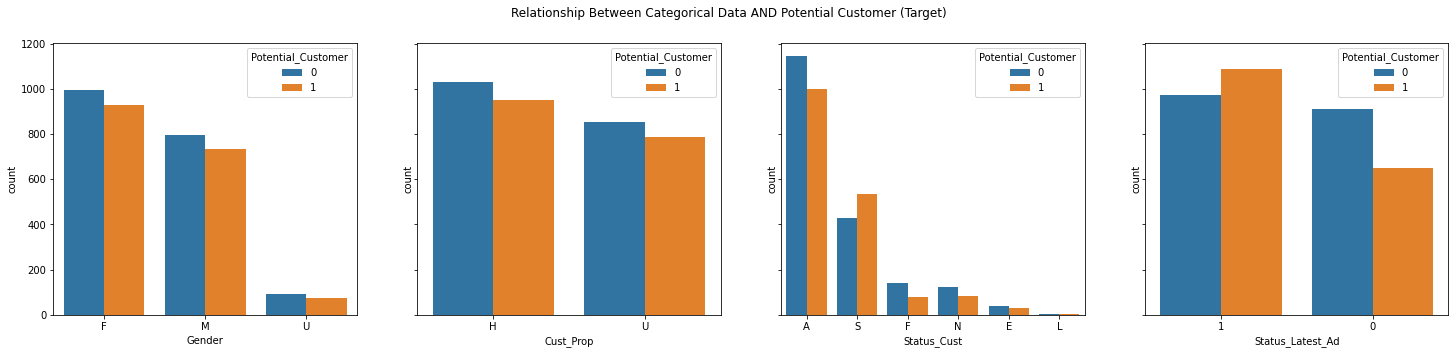

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(25,5), sharey=True)

j=0
for i in CatFes:
  sns.countplot(data[i], ax=ax[j], hue=data['Potential_Customer'], order=data[i].value_counts().index)
  j+=1  
  fig.show()

fig.suptitle('Relationship Between Categorical Data AND Potential Customer (Target)')
fig.show()

## 3.3 Explore Numerical Variables

**Hint**: use `sns.distplot()` and `sns.boxplot()`

In [ ]:
from scipy.stats import norm

In [ ]:
data[NumCols].describe()

,Pur_3_years_Avg,Cust_Ann_Income,Ad_Res_Ind_1_Year,Pur_3_years,Ad_Res_Ind_5_Year,Ad_Res_Ind_3_Year,Cust_Last_Purchase,Pur_5_years_Avg,Pur_5_years,Ad_Res_5_Year,Ad_Res_3_Year,Pur_5_years_Indirect,Pur_3_years_Avg_Indirect,Age,Pur_3_years_Indirect,Pur_latest,InAct_First,InAct_Last,Ad_Res_1_year
count,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,1736.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000,2956.000000,2825.000000,3618.000000,3618.000000,3618.000000,3618.000000,3618.000000
mean,14.309536,41608.894417,5.403814,3.308734,19.508292,12.064400,14.557748,11.913532,11.018795,49.613875,29.598673,5.887507,13.582128,59.018761,1.909066,15.267344,73.807352,17.934218,13.031786
std,10.060256,26127.991993,1.356644,2.185492,8.547971,4.569374,11.566174,8.046675,9.405537,22.864578,7.728158,4.904147,9.729153,16.900077,1.624995,10.794970,38.127214,4.145219,4.941665
min,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000,1.000000,1.500000,1.000000,7.000000,5.000000,0.000000,1.750000,0.000000,0.000000,0.000000,15.000000,4.000000,3.000000
25%,9.000000,31385.750000,5.000000,2.000000,13.000000,8.000000,8.000000,7.500000,4.000000,31.000000,26.000000,2.000000,8.000000,47.000000,1.000000,10.000000,40.000000,16.000000,11.000000
50%,13.000000,44284.500000,6.000000,3.000000,20.000000,13.000000,11.000000,10.295000,9.000000,50.000000,31.000000,5.000000,11.670000,60.000000,2.000000,15.000000,74.000000,18.000000,12.000000
75%,17.500000,56508.000000,6.000000,4.000000,27.000000,16.000000,20.000000,14.787500,15.000000,66.000000,33.000000,9.000000,16.670000,73.000000,3.000000,20.000000,111.000000,20.000000,13.000000
max,260.000000,174305.000000,17.000000,15.000000,56.000000,28.000000,200.000000,200.000000,91.000000,157.000000,71.000000,41.000000,260.000000,87.000000,9.000000,250.000000,260.000000,27.000000,49.000000


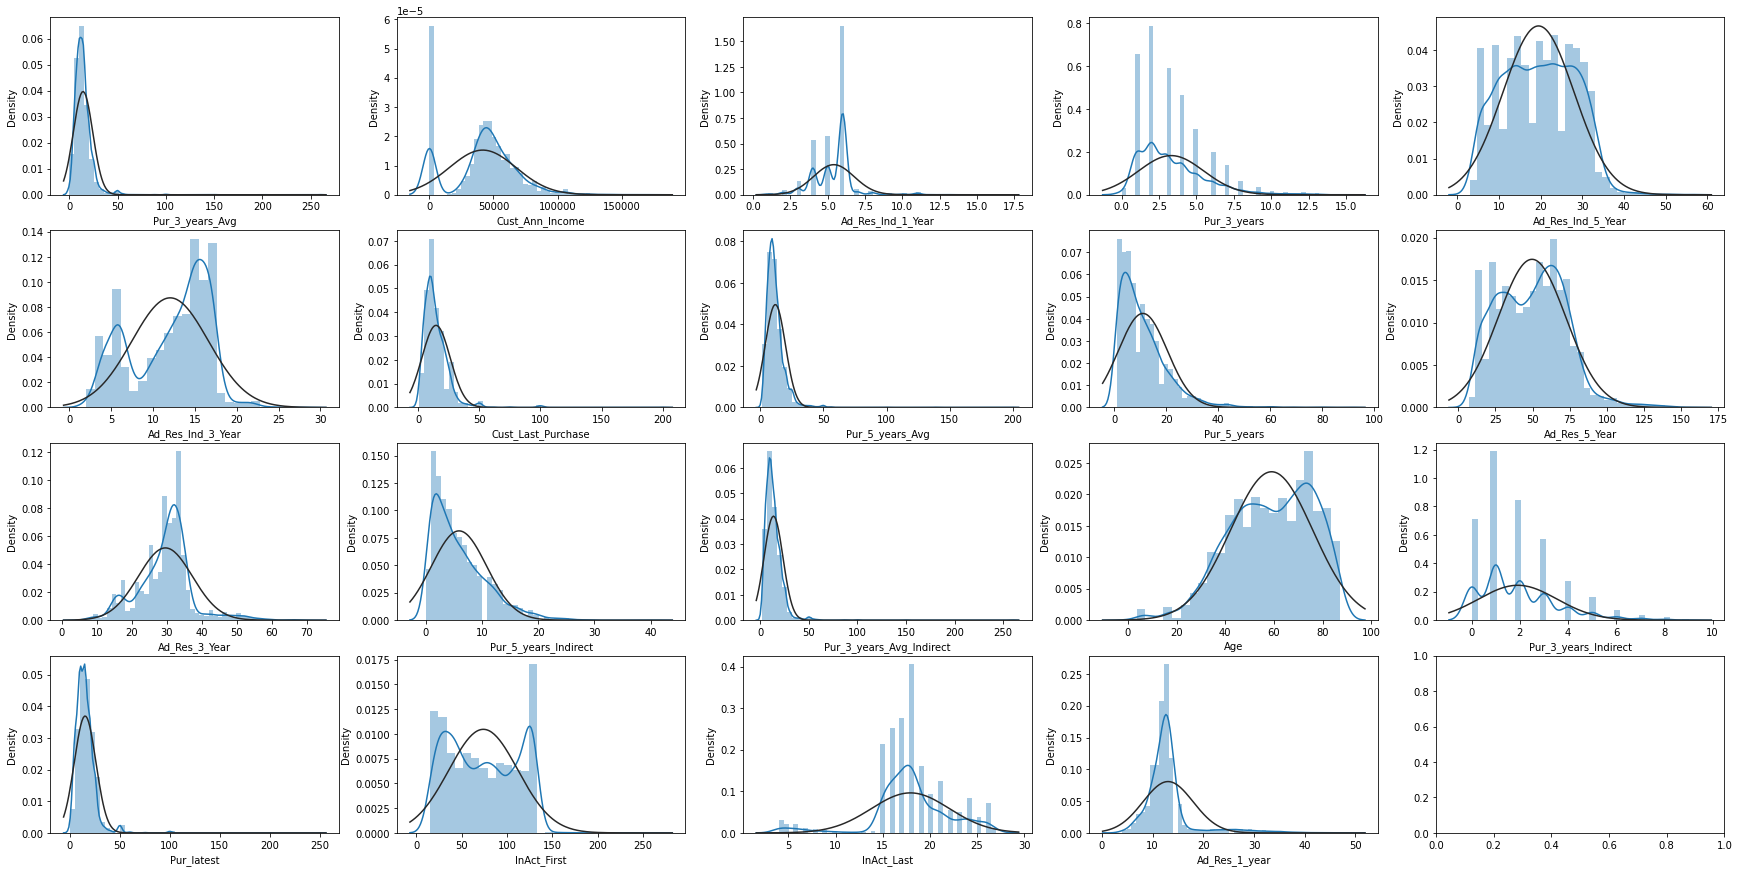

In [ ]:
# https://newbedev.com/how-to-plot-a-matrix-of-seaborn-distplots-for-all-columns-in-the-dataframe
NumCols2 = NumCols
CatCols2 = CatCols
df = data

fig, ax = plt.subplots(4,5, figsize=(30,15))

for i, NumCols2 in enumerate(df[NumCols2]):
  sns.distplot(df[NumCols2],ax=ax[i//5,i%5], fit=norm)



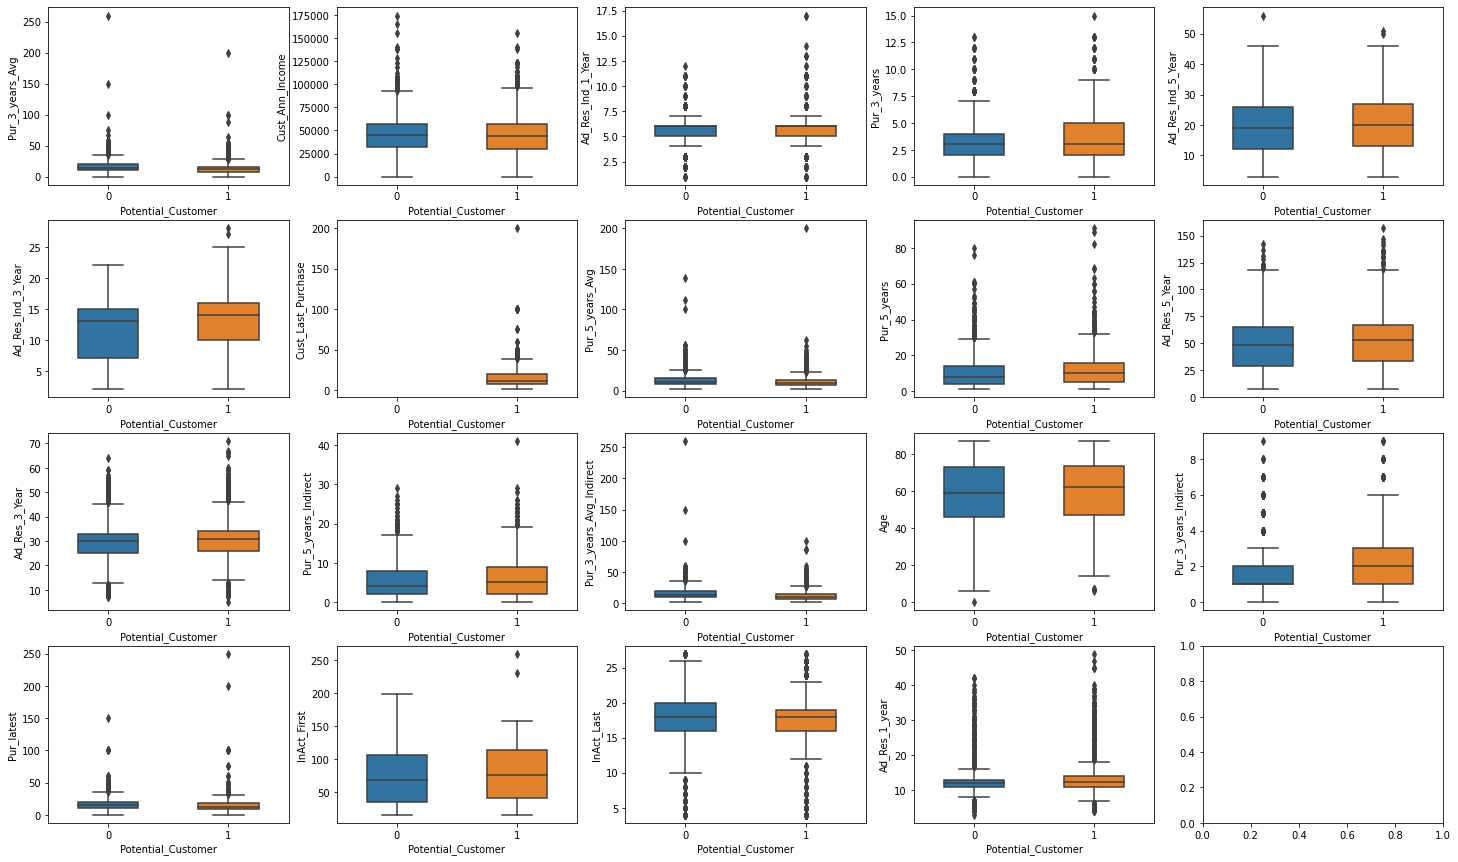

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
NumCols2 = NumCols
CatCols2 = CatCols
df = data

fig, ax = plt.subplots(4,5, figsize=(25,15))

for i, NumCols2 in enumerate(df[NumCols2]):
  sns.boxplot(x=df['Potential_Customer'], y= df[NumCols2],ax=ax[i//5,i%5], width=0.5)

### 3.3.1 Insight

In [ ]:
data[NumCols].skew()

Pur_3_years_Avg             7.913836
Cust_Ann_Income             0.039826
Ad_Res_Ind_1_Year           0.943712
Pur_3_years                 1.291322
Ad_Res_Ind_5_Year           0.068045
Ad_Res_Ind_3_Year          -0.448007
Cust_Last_Purchase          4.966810
Pur_5_years_Avg             6.756579
Pur_5_years                 2.079296
Ad_Res_5_Year               0.401333
Ad_Res_3_Year               0.321259
Pur_5_years_Indirect        1.287071
Pur_3_years_Avg_Indirect    8.043963
Age                        -0.406354
Pur_3_years_Indirect        1.124769
Pur_latest                  6.660116
InAct_First                 0.136455
InAct_Last                 -0.808274
Ad_Res_1_year               2.788479
dtype: float64

In [ ]:
# Check for columns with skewness 

skew_pos = [i for i in df[NumCols] if df[i].skew() > 1 ]
skew_neg = [i for i in df[NumCols] if df[i].skew() < -1]

print('Positive Skew:', skew_pos)
print('Negative Skew:', skew_neg)


Positive Skew: ['Pur_3_years_Avg', 'Pur_3_years', 'Cust_Last_Purchase', 'Pur_5_years_Avg', 'Pur_5_years', 'Pur_5_years_Indirect', 'Pur_3_years_Avg_Indirect', 'Pur_3_years_Indirect', 'Pur_latest', 'Ad_Res_1_year']
Negative Skew: []


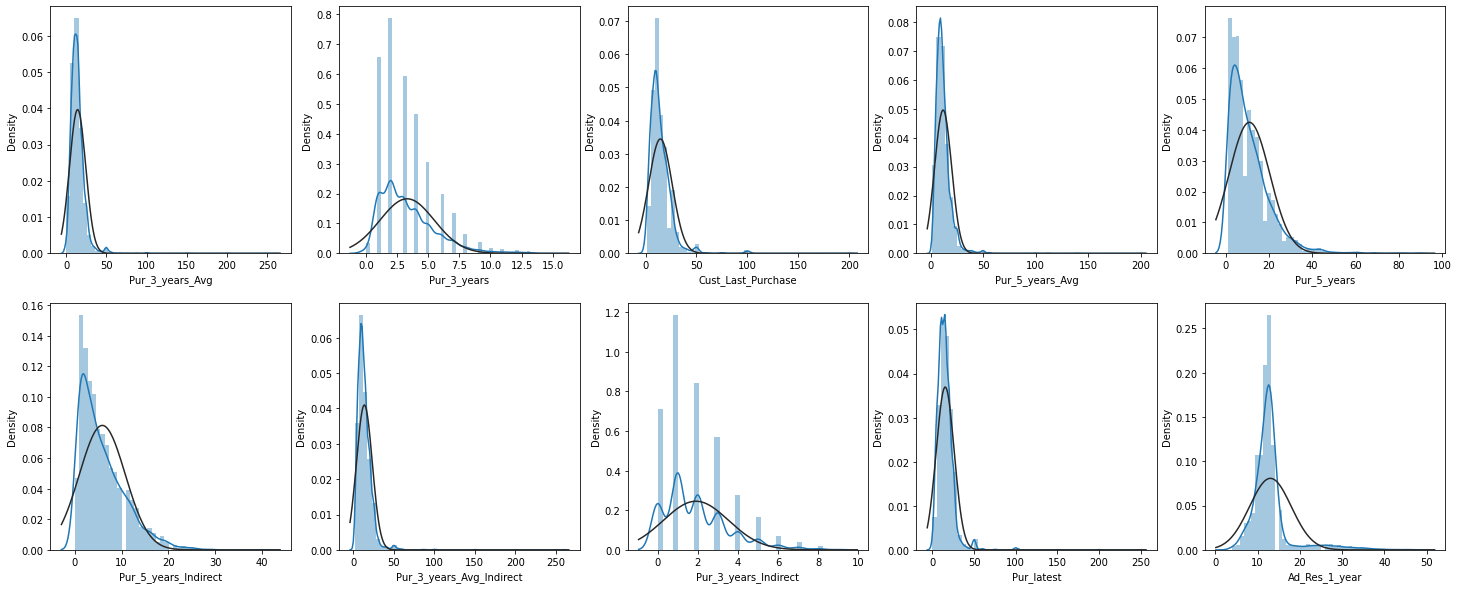

In [ ]:
# Visualizing the skewness and normal distribution

skew_pos2 = skew_pos
fig, ax = plt.subplots(2,5, figsize=(25,10))

for i, skew_pos2 in enumerate(df[skew_pos2]):
  sns.distplot(df[skew_pos2],ax=ax[i//5,i%5], fit=norm)


## 3.3.2 Check the Data for Missing Values
**Hint:**
1. Check which columns have missing values

2. Create a list of the name of the columns that have missing values
    `null_columns=data.columns[data.isnull().any()]`
   
3. Decide how you should handle the missing values for each column:

    a. For some numerical columns missing value simply means 0.
    b. We can fill missing values in a numerical column by replacing mean of the column, if the column is not skewed. If the column is skewed, median might be a better option.

In [ ]:
# Columns with null values
null_columns = data.columns[data.isnull().any()]
null_columns

Index(['Cust_Last_Purchase', 'Pur_3_years_Avg_Indirect', 'Age'], dtype='object')

In [ ]:
# Columns with skewness and no skewness
skew_col = skew_pos
noskew_col = list(set(data)-set(skew_pos))

# Skew columns that have null values in it
null_skew = [i for i in null_columns if i in skew_col]
null_noskew = [i for i in null_columns if i in noskew_col]

null_zero = ['Cust_Last_Purchase']
null_skew = list(set(null_skew)-set(null_zero))

print('Columns replacing null with 0:', null_zero)
print('Non-skewed Columns replacing null with mean:', null_noskew)
print('Skewed Columns replacing null with median :', null_skew)


Columns replacing null with 0: ['Cust_Last_Purchase']
Non-skewed Columns replacing null with mean: ['Age']
Skewed Columns replacing null with median : ['Pur_3_years_Avg_Indirect']


In [ ]:
# Non-skewed column (Age) use mean, since age cannot be 0
# Skewed column (Pur_3_years_Avg_Indirect) use median
# Cust_Last_Purchase use 0 because null = 0 transaction

data[null_noskew] = data[null_noskew].fillna(data[null_noskew].mean())
data[null_skew] = data[null_skew].fillna(data[null_skew].median())
data[null_zero] = data[null_zero].fillna(0)

In [ ]:
# Recheck for null

data.isnull().sum()

Potential_Customer          0
C_ID                        0
Cust_Last_Purchase          0
Pur_3_years                 0
Pur_5_years                 0
Pur_3_years_Indirect        0
Pur_5_years_Indirect        0
Pur_latest                  0
Pur_3_years_Avg             0
Pur_5_years_Avg             0
Pur_3_years_Avg_Indirect    0
InAct_Last                  0
InAct_First                 0
Ad_Res_1_year               0
Ad_Res_3_Year               0
Ad_Res_5_Year               0
Ad_Res_Ind_1_Year           0
Ad_Res_Ind_3_Year           0
Ad_Res_Ind_5_Year           0
Status_Cust                 0
Status_Latest_Ad            0
Age                         0
Gender                      0
Cust_Prop                   0
Cust_Ann_Income             0
dtype: int64

## 3.4 Explore the Relationship between Numerical Variables & Target Variable. Interpret your observation

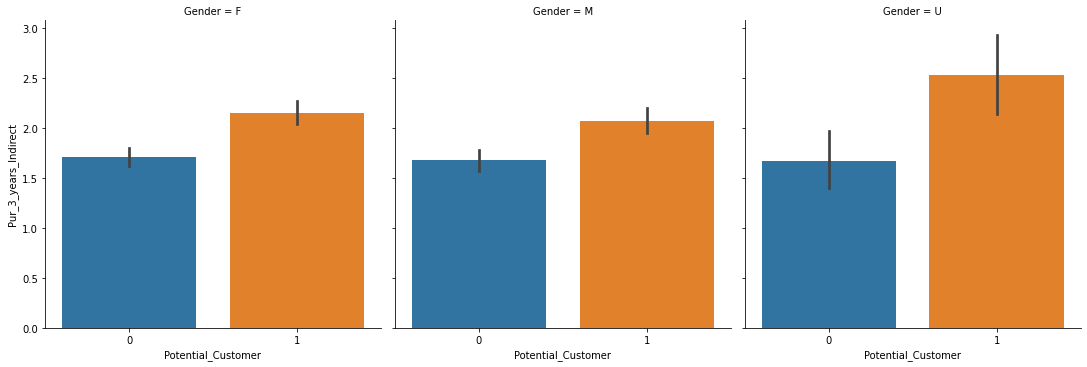

In [ ]:
sns.catplot(data=data, x='Potential_Customer', y='Pur_3_years_Indirect', col='Gender', kind='bar')

In [ ]:
lla = data.groupby(['Status_Cust'], as_index=False).mean()
lla
#lla.plot(kind='bar')

,Status_Cust,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Age,Cust_Ann_Income,Pur_3_Total,Pur_5_Total,Pur_3_Total_Indirect,Pur_3_Total_DirInd
0,A,7.407852,2.838304,9.102050,1.534017,4.721342,16.549511,15.413933,12.333593,13.975736,18.410065,73.751631,13.185461,30.815005,49.826654,5.500000,11.993476,19.533551,58.629187,42534.027027,38.831552,100.835909,20.584879,59.416431
1,E,6.500000,2.513889,7.819444,1.583333,4.944444,14.930556,14.190833,12.525139,12.697639,16.194444,58.500000,7.472222,16.180556,28.444444,2.111111,5.097222,11.319444,54.455388,21541.097222,31.389167,79.914583,18.861250,50.250417
2,F,8.123288,1.164384,1.712329,0.812785,1.141553,21.881279,20.901416,20.906575,17.862283,17.356164,21.283105,11.392694,17.205479,16.634703,4.433790,6.315068,6.383562,54.662075,46378.894977,23.397489,27.621553,16.018219,39.415708
3,L,11.500000,2.500000,11.800000,1.000000,6.100000,20.600000,20.310000,15.706000,16.584000,13.300000,90.000000,15.000000,33.600000,60.100000,5.500000,11.900000,23.300000,57.401876,37022.700000,47.800000,142.475000,17.899000,65.699000
4,N,7.048309,1.893720,2.420290,1.338164,1.468599,16.881643,15.183527,15.633237,15.232077,18.927536,24.434783,11.652174,20.758454,19.937198,5.004831,9.000000,8.077295,58.091760,44234.681159,27.511498,33.588164,19.658454,47.169952
5,S,5.761411,5.214730,19.477178,3.149378,10.578838,10.533714,10.112407,8.051639,10.101068,16.970954,97.440871,13.753112,32.565353,64.477178,5.740664,14.708506,25.460581,61.432413,39448.355809,47.854865,150.837313,28.665145,76.520010


In [ ]:
# Can change ylabels into any column to find its relataion to Status_Cust

ylabels = 'Age'

statussort = lla.sort_values(ylabels, ascending=False).Status_Cust.unique()
statussort

['S', 'A', 'N', 'L', 'F', 'E']
Categories (6, object): ['S', 'A', 'N', 'L', 'F', 'E']

In [ ]:
llamean = lla.groupby(['Status_Cust'])[ylabels].mean()
percent = llamean/llamean.sum()*100
percent = percent.sort_values(ascending=False)

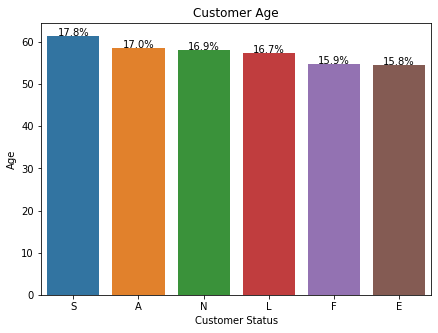

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.barplot(data=lla, x='Status_Cust', y = ylabels, ci=None, order=statussort)

percentage = percent

patches = ax.patches
for i in range(len(percentage)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')

plt.title('Customer Age')
plt.xlabel('Customer Status')
plt.ylabel(ylabels)
plt.show()


## 3.5 Explore the Relationship between the columns and try to answer the following questions:

1. Is there any significant difference between men/women's salary?

2. Is there any significant difference between men/women's number of the purchase in the last three years?

3. Is there any significant difference between men/women's average purchase in the last three years?

4. Is there any significant difference between men/women's total purchase in the last three years?

5. (optional) You can explore more about the relationships between the columns, if you believe the insight will improve some dicisions in this company. For instance, sending advertisements to customers regarding gender, customer status, etc.

In [ ]:
data.columns

Index(['Potential_Customer', 'C_ID', 'Cust_Last_Purchase', 'Pur_3_years',
       'Pur_5_years', 'Pur_3_years_Indirect', 'Pur_5_years_Indirect',
       'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg',
       'Pur_3_years_Avg_Indirect', 'InAct_Last', 'InAct_First',
       'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year',
       'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_5_Year', 'Status_Cust',
       'Status_Latest_Ad', 'Age', 'Gender', 'Cust_Prop', 'Cust_Ann_Income'],
      dtype='object')

In [ ]:
data['Pur_3_years_Avg']

0        7.50
1       25.00
2       15.00
3       20.00
4        4.33
        ...  
3613    16.50
3614    12.71
3615    12.43
3616    20.00
3617    13.00
Name: Pur_3_years_Avg, Length: 3618, dtype: float64

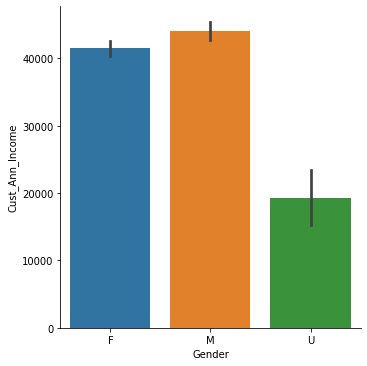

In [ ]:
# 1. Is there any significant difference between men/women's salary?
# Ans: No

sns.catplot(data=data, x='Gender', y='Cust_Ann_Income', kind='bar')

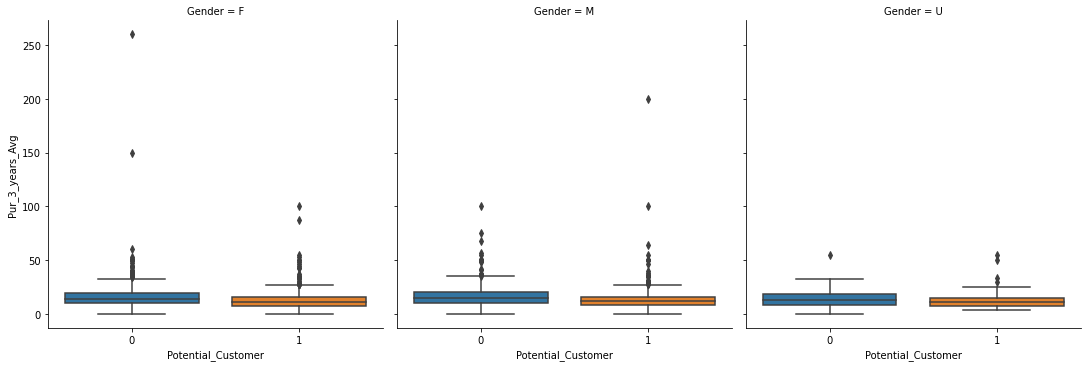

In [ ]:
# 2. Is there any significant difference between men/women's number of the purchase in the last three years?
# Ans: No

sns.catplot(data=data, x='Potential_Customer', y='Pur_3_years_Avg', col='Gender', kind='box')

NameError: ignored

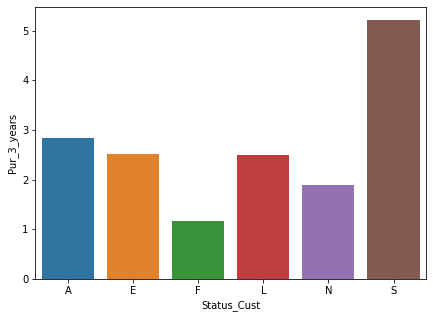

In [ ]:


plt.figure(figsize=(7,5))
ax = sns.barplot(data=data, x='Status_Cust', y = 'Pur_3_years', ci=None)



patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.show()

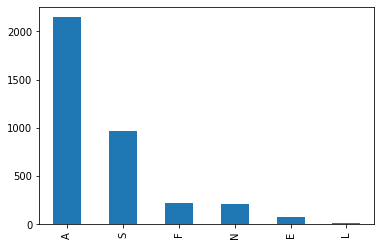

In [ ]:
data.Status_Cust.value_counts().plot(kind='bar')

In [ ]:
data.groupby('Status_Cust').Age.mean()

Status_Cust
A    58.629187
E    54.455388
F    54.662075
L    57.401876
N    58.091760
S    61.432413
Name: Age, dtype: float64

In [ ]:
data[data.Status_Cust=='S']

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income,Pur_3_Total,Pur_5_Total,Pur_3_Total_Indirect,Pur_3_Total_DirInd
2,0,88003,0.0,5.0,12.0,3.0,5.0,15.0,15.00,11.25,14.67,19.0,57.0,14.0,35.0,53.0,6.0,17.0,22.0,S,1,79.000000,F,U,0.0,75.00,135.00,44.01,119.01
4,1,88056,5.0,3.0,15.0,2.0,7.0,3.0,4.33,3.80,4.00,17.0,118.0,13.0,28.0,63.0,6.0,12.0,24.0,S,1,68.000000,F,H,113663.0,12.99,57.00,8.00,20.99
8,1,88153,13.0,4.0,16.0,3.0,9.0,5.0,7.75,8.06,7.00,24.0,122.0,6.0,26.0,60.0,3.0,14.0,27.0,S,1,49.000000,F,H,56828.0,31.00,128.96,21.00,52.00
9,0,88151,0.0,4.0,14.0,4.0,14.0,16.0,14.50,11.57,14.50,16.0,104.0,14.0,34.0,72.0,6.0,16.0,30.0,S,1,63.000000,M,H,56828.0,58.00,161.98,58.00,116.00
10,0,88137,0.0,3.0,5.0,0.0,1.0,15.0,12.67,10.60,11.67,19.0,40.0,11.0,30.0,32.0,6.0,6.0,13.0,S,1,73.000000,M,H,56828.0,38.01,53.00,0.00,38.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,1,87508,9.0,5.0,19.0,2.0,10.0,8.0,8.60,6.26,9.00,19.0,129.0,14.0,35.0,72.0,6.0,16.0,32.0,S,1,45.000000,F,U,40341.0,43.00,118.94,18.00,61.00
3607,1,87680,12.0,5.0,23.0,5.0,16.0,12.0,11.20,8.04,11.20,18.0,127.0,10.0,30.0,74.0,5.0,15.0,31.0,S,1,59.018761,F,U,41070.0,56.00,184.92,56.00,112.00
3608,0,87719,0.0,3.0,21.0,1.0,12.0,6.0,10.67,6.38,12.00,18.0,128.0,13.0,34.0,74.0,6.0,16.0,32.0,S,1,59.018761,F,U,33016.0,32.01,133.98,12.00,44.01
3610,0,87748,0.0,2.0,13.0,1.0,7.0,10.0,9.00,5.62,10.00,16.0,127.0,12.0,30.0,67.0,5.0,12.0,29.0,S,1,50.000000,M,U,67646.0,18.00,73.06,10.00,28.00


# <font color=green>4. Feature Enginearing<font>

## 4.1 Add Some High Level Features and explore their relationship with the target variable

Sometimes we can use high level features that reflect the interactions between the columns as new features to get better insight and feed more information to our predictive models. Also transformation of some columns can be better options to be fed to the models. For instance, instead of a numerical column, you can use log of the column, square of the column, or any other transformation of the column. The type of interaction, or transformation you should choose, can be defined after Exploratory data analysis or just business insight.

**Example:** Instead of two variables for the number of purchase, and the average amount of purchase, we could calculate the total amount of purchase for the customers. 

In [ ]:
data.columns

Index(['Potential_Customer', 'C_ID', 'Cust_Last_Purchase', 'Pur_3_years',
       'Pur_5_years', 'Pur_3_years_Indirect', 'Pur_5_years_Indirect',
       'Pur_latest', 'Pur_3_years_Avg', 'Pur_5_years_Avg',
       'Pur_3_years_Avg_Indirect', 'InAct_Last', 'InAct_First',
       'Ad_Res_1_year', 'Ad_Res_3_Year', 'Ad_Res_5_Year', 'Ad_Res_Ind_1_Year',
       'Ad_Res_Ind_3_Year', 'Ad_Res_Ind_5_Year', 'Status_Cust',
       'Status_Latest_Ad', 'Age', 'Gender', 'Cust_Prop', 'Cust_Ann_Income'],
      dtype='object')

In [ ]:
# Total for direct purchase 3 years and 5 years

data['Pur_3_Total'] = data['Pur_3_years_Avg'] * data['Pur_3_years']
data['Pur_5_Total'] = data['Pur_5_years_Avg'] * data['Pur_5_years']

# Total for 3 years indirect & total both direct n indirect
# Pur 5 years doesn't have data on indirect Avg so total for both direct&indirect cannot be made

data['Pur_3_Total_Indirect'] = data['Pur_3_years_Avg_Indirect'] * data['Pur_3_years_Indirect']
data['Pur_3_Total_DirInd'] = data['Pur_3_Total'] + data['Pur_3_Total_Indirect']

noskew_col = list(set(data)-set(skew_pos))

NumColsTot = NumCols + ['Pur_3_Total', 'Pur_5_Total', 'Pur_3_Total_Indirect', 'Pur_3_Total_DirInd']

In [ ]:
NumColsTot
# data = data.drop(['Pur_5_Total'], axis=1) # Kalau nak remove column

['Pur_3_years_Avg',
 'Cust_Ann_Income',
 'Ad_Res_Ind_1_Year',
 'Pur_3_years',
 'Ad_Res_Ind_5_Year',
 'Ad_Res_Ind_3_Year',
 'Cust_Last_Purchase',
 'Pur_5_years_Avg',
 'Pur_5_years',
 'Ad_Res_5_Year',
 'Ad_Res_3_Year',
 'Pur_5_years_Indirect',
 'Pur_3_years_Avg_Indirect',
 'Age',
 'Pur_3_years_Indirect',
 'Pur_latest',
 'InAct_First',
 'InAct_Last',
 'Ad_Res_1_year',
 'Pur_3_Total',
 'Pur_5_Total',
 'Pur_3_Total_Indirect',
 'Pur_3_Total_DirInd']

## 4.2 Check Correlation between Numerical Variables

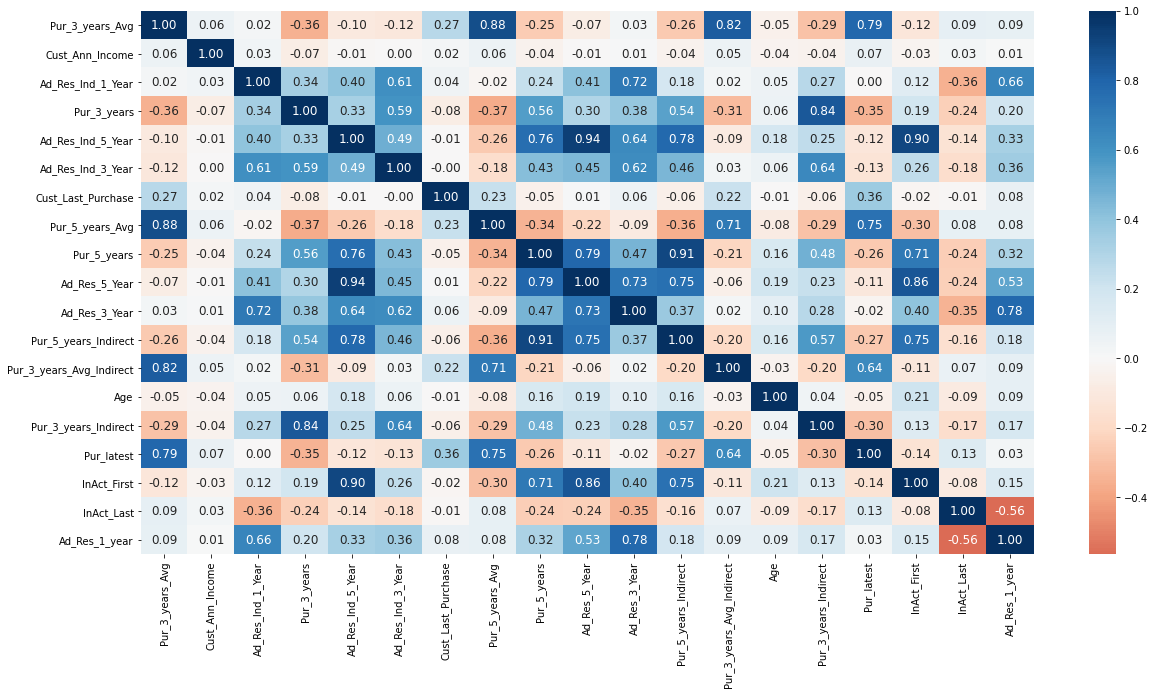

In [ ]:
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data[NumCols].corr(), cmap='RdBu', center=0, annot=True, fmt='.2f', annot_kws={'fontsize':12} )

# Can Change to use data[NumCols] for original columns 

# <font color=green>5. Feature Selection<font>

It is better we do not have numerical columns with high correlations as they confuse the machine learning algorithms. We can manually remove the highly-correlated features, or we can let the PCA handles that during the pre-processing.

# <font color=green>6. Data PreProcessing<font>

## 6.1 Separate X (features) and y (target)

**Attention:** Don't forget to exclude the column `Cust_Last_Purchase` from your analysis

In [ ]:
ColsML = list(set(data.columns)-set(['Cust_Last_Purchase','Potential_Customer']))
ColsML

['Pur_3_years_Avg',
 'Pur_5_years',
 'Pur_3_Total_Indirect',
 'Cust_Ann_Income',
 'C_ID',
 'Ad_Res_5_Year',
 'Gender',
 'Ad_Res_3_Year',
 'Ad_Res_Ind_1_Year',
 'Pur_5_years_Indirect',
 'Status_Cust',
 'Pur_3_years',
 'Ad_Res_Ind_5_Year',
 'Pur_3_years_Avg_Indirect',
 'Cust_Prop',
 'Age',
 'Pur_5_Total',
 'Pur_3_years_Indirect',
 'Pur_latest',
 'Pur_3_Total',
 'Status_Latest_Ad',
 'Pur_3_Total_DirInd',
 'Ad_Res_Ind_3_Year',
 'InAct_First',
 'InAct_Last',
 'Ad_Res_1_year',
 'Pur_5_years_Avg']

In [ ]:
target = 'Potential_Customer'
X = data[ColsML]
y = data[target]

## 6.2 Dummy Variables
Change categorical variables with numerical variabels

In [ ]:
CatColsML = list(set(CatCols)-set(['Potential_Customer'])) # same as CatFes, just renamed for easier remembering
CatColsML

['Gender', 'Cust_Prop', 'Status_Cust', 'Status_Latest_Ad']

In [ ]:
NumColsML = list(set(ColsML)-set(CatColsML))
NumColsML

['Pur_3_years_Avg',
 'Pur_3_Total_Indirect',
 'Pur_5_years',
 'Cust_Ann_Income',
 'C_ID',
 'Ad_Res_5_Year',
 'Ad_Res_3_Year',
 'Ad_Res_Ind_1_Year',
 'Pur_5_years_Indirect',
 'Pur_3_years',
 'Ad_Res_Ind_5_Year',
 'Pur_3_years_Avg_Indirect',
 'Age',
 'Pur_5_Total',
 'Pur_3_years_Indirect',
 'Pur_latest',
 'Pur_3_Total',
 'Pur_3_Total_DirInd',
 'Ad_Res_Ind_3_Year',
 'InAct_First',
 'InAct_Last',
 'Ad_Res_1_year',
 'Pur_5_years_Avg']

In [ ]:
datawDummy = pd.get_dummies(data[ColsML], columns=CatColsML, drop_first=True)
datawDummy

,Pur_3_years_Avg,Pur_5_years,Pur_3_Total_Indirect,Cust_Ann_Income,C_ID,Ad_Res_5_Year,Ad_Res_3_Year,Ad_Res_Ind_1_Year,Pur_5_years_Indirect,Pur_3_years,Ad_Res_Ind_5_Year,Pur_3_years_Avg_Indirect,Age,Pur_5_Total,Pur_3_years_Indirect,Pur_latest,Pur_3_Total,Pur_3_Total_DirInd,Ad_Res_Ind_3_Year,InAct_First,InAct_Last,Ad_Res_1_year,Pur_5_years_Avg,Gender_M,Gender_U,Cust_Prop_U,Status_Cust_E,Status_Cust_F,Status_Cust_L,Status_Cust_N,Status_Cust_S,Status_Latest_Ad_1
0,7.50,17.0,15.00,65957.0,9946,73.0,48.0,3.0,4.0,2.0,16.0,7.50,71.0,131.92,2.0,0.0,15.00,30.00,12.0,110.0,14.0,32.0,7.76,0,0,0,0,0,0,0,0,0
1,25.00,7.0,0.00,0.0,87939,55.0,35.0,6.0,3.0,1.0,22.0,11.67,7.0,91.00,0.0,25.0,25.00,25.00,6.0,75.0,18.0,13.0,13.00,1,0,1,0,0,0,0,0,1
2,15.00,12.0,44.01,0.0,88003,53.0,35.0,6.0,5.0,5.0,22.0,14.67,79.0,135.00,3.0,15.0,75.00,119.01,17.0,57.0,19.0,14.0,11.25,0,0,1,0,0,0,0,1,1
3,20.00,11.0,0.00,76293.0,188721,71.0,38.0,8.0,3.0,1.0,33.0,11.67,73.0,136.95,0.0,20.0,20.00,20.00,8.0,113.0,5.0,17.0,12.45,0,0,1,0,0,0,0,0,0
4,4.33,15.0,8.00,113663.0,88056,63.0,28.0,6.0,7.0,3.0,24.0,4.00,68.0,57.00,2.0,3.0,12.99,20.99,12.0,118.0,17.0,13.0,3.80,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,16.50,6.0,0.00,83754.0,87771,47.0,34.0,6.0,1.0,2.0,17.0,11.67,33.0,79.98,0.0,20.0,33.00,33.00,6.0,57.0,19.0,13.0,13.33,0,0,0,0,0,0,0,0,0
3614,12.71,31.0,53.00,83754.0,90077,88.0,32.0,6.0,21.0,7.0,35.0,13.25,81.0,339.14,4.0,13.0,88.97,141.97,17.0,128.0,17.0,13.0,10.94,0,0,0,0,0,0,0,1,1
3615,12.43,13.0,75.00,0.0,94040,57.0,36.0,7.0,8.0,7.0,24.0,12.50,39.0,138.06,6.0,3.0,87.01,162.01,18.0,80.0,4.0,16.0,10.62,1,0,1,0,0,0,0,0,1
3616,20.00,11.0,20.00,71618.0,87871,61.0,31.0,6.0,7.0,1.0,25.0,20.00,76.0,182.05,1.0,20.0,20.00,40.00,15.0,93.0,24.0,11.0,16.55,1,0,0,0,0,0,0,0,1


In [ ]:
# Make dummy variables for all categorical column 

dummyvar = pd.get_dummies(data[CatColsML], drop_first=True)
dummyvar

,Gender_M,Gender_U,Cust_Prop_U,Status_Cust_E,Status_Cust_F,Status_Cust_L,Status_Cust_N,Status_Cust_S,Status_Latest_Ad_1
0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,0,1,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
3613,0,0,0,0,0,0,0,0,0
3614,0,0,0,0,0,0,0,1,1
3615,1,0,1,0,0,0,0,0,1
3616,1,0,0,0,0,0,0,0,1


In [ ]:
dummyCols = ['Gender_M', 'Gender_U', 'Status_Latest_Ad_1', 'Status_Cust_E', 'Status_Cust_F', 'Status_Cust_L', 'Status_Cust_N', 'Status_Cust_S', 'Cust_Prop_U']

In [ ]:
NewNumCols = NumColsML

In [ ]:
target = 'Potential_Customer'
X = datawDummy
y = data[target]

In [ ]:
X

,Pur_3_years_Avg,Pur_5_years,Pur_3_Total_Indirect,Cust_Ann_Income,C_ID,Ad_Res_5_Year,Ad_Res_3_Year,Ad_Res_Ind_1_Year,Pur_5_years_Indirect,Pur_3_years,Ad_Res_Ind_5_Year,Pur_3_years_Avg_Indirect,Age,Pur_5_Total,Pur_3_years_Indirect,Pur_latest,Pur_3_Total,Pur_3_Total_DirInd,Ad_Res_Ind_3_Year,InAct_First,InAct_Last,Ad_Res_1_year,Pur_5_years_Avg,Gender_M,Gender_U,Cust_Prop_U,Status_Cust_E,Status_Cust_F,Status_Cust_L,Status_Cust_N,Status_Cust_S,Status_Latest_Ad_1
0,7.50,17.0,15.00,65957.0,9946,73.0,48.0,3.0,4.0,2.0,16.0,7.50,71.0,131.92,2.0,0.0,15.00,30.00,12.0,110.0,14.0,32.0,7.76,0,0,0,0,0,0,0,0,0
1,25.00,7.0,0.00,0.0,87939,55.0,35.0,6.0,3.0,1.0,22.0,11.67,7.0,91.00,0.0,25.0,25.00,25.00,6.0,75.0,18.0,13.0,13.00,1,0,1,0,0,0,0,0,1
2,15.00,12.0,44.01,0.0,88003,53.0,35.0,6.0,5.0,5.0,22.0,14.67,79.0,135.00,3.0,15.0,75.00,119.01,17.0,57.0,19.0,14.0,11.25,0,0,1,0,0,0,0,1,1
3,20.00,11.0,0.00,76293.0,188721,71.0,38.0,8.0,3.0,1.0,33.0,11.67,73.0,136.95,0.0,20.0,20.00,20.00,8.0,113.0,5.0,17.0,12.45,0,0,1,0,0,0,0,0,0
4,4.33,15.0,8.00,113663.0,88056,63.0,28.0,6.0,7.0,3.0,24.0,4.00,68.0,57.00,2.0,3.0,12.99,20.99,12.0,118.0,17.0,13.0,3.80,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3613,16.50,6.0,0.00,83754.0,87771,47.0,34.0,6.0,1.0,2.0,17.0,11.67,33.0,79.98,0.0,20.0,33.00,33.00,6.0,57.0,19.0,13.0,13.33,0,0,0,0,0,0,0,0,0
3614,12.71,31.0,53.00,83754.0,90077,88.0,32.0,6.0,21.0,7.0,35.0,13.25,81.0,339.14,4.0,13.0,88.97,141.97,17.0,128.0,17.0,13.0,10.94,0,0,0,0,0,0,0,1,1
3615,12.43,13.0,75.00,0.0,94040,57.0,36.0,7.0,8.0,7.0,24.0,12.50,39.0,138.06,6.0,3.0,87.01,162.01,18.0,80.0,4.0,16.0,10.62,1,0,1,0,0,0,0,0,1
3616,20.00,11.0,20.00,71618.0,87871,61.0,31.0,6.0,7.0,1.0,25.0,20.00,76.0,182.05,1.0,20.0,20.00,40.00,15.0,93.0,24.0,11.0,16.55,1,0,0,0,0,0,0,0,1


## 6.3 Split data to train/test 

Split the data into 75/25 train/test set. Use random_state=42 and stratify=y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2713, 32)
(2713,)
(905, 32)
(905,)


## 6.4 Feature Scaling

In [ ]:
# MinMaxScaler or StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.shape

(2713, 32)

## 6.5 PCA on Numerical Columns only

1. Save the above scaled train and test data, as dataframe with proper column names
`X_train_sc=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)`
2. Separate train and test data for numerical columns only
`train_PCA=X_train_sc[NewNumCols]`, `test_PCA=X_test_sc[NewNumCols]`
3. Define the number of components on `train_PCA`
4. Fit PCA on `train_PCA` 
5. Transform `train_PCA` and `test_PCA` save it as `PCA_train` and `PCA_test`, and save them as DataFrame. Use `PCA_train.index=X_train.index` to make sure `PCA_train` have the same index with `X_train` because we need to concat this data to the dummy variables. Do the same on `PCA_test`
6. Concat `PCA_train` to the dummy variables in `X_train` save it as `X_train_pca`
7. Concat `PCA_test` to the dummy variables in `X_test` save it as `X_train_pca`

In [ ]:
print('ColsML:', len(ColsML))
print('NumColsML:', len(NumColsML)) # NewNumCols
print('CatColsML:', len(CatColsML))
print('Dummy shape:', dummyvar.shape)
print('datawDummy shape:', datawDummy.shape) # 32 column = 23 NumColsML + 9 dummy column
print('Original data shape:', data.shape) # ColsMl + [Potential_Customer + Cust_Last_Purchase]
print('\nX_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

ColsML: 27
NumColsML: 23
CatColsML: 4
Dummy shape: (3618, 9)
datawDummy shape: (3618, 32)
Original data shape: (3618, 29)

X_train shape: (2713, 32)
y_train shape: (2713,)
X_test shape: (905, 32)
y_test shape: (905,)


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_train_sc = pd.DataFrame(scaler.transform(X_train_scaled), columns = X_train.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test_scaled), columns = X_test.columns)

In [ ]:
# NewNumCols = NumColsML

train_PCA = X_train_sc[NewNumCols]
test_PCA = X_test_sc[NewNumCols]

Text(0, 0.5, 'cumulative explained variance')

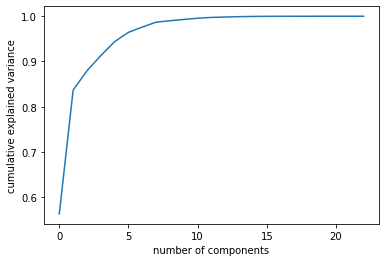

In [ ]:
# Check for number of components vs explained var
# with 5 no of components, ±95% variance can be explained 

pca = PCA().fit(train_PCA)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# Fit and Transform PCA
pca = PCA(7)
pca.fit(train_PCA)
PCA_train = pca.transform(train_PCA)
PCA_test = pca.transform(test_PCA)

# Save PCA_train and PCA_test as DataFrame
PCA_train = pd.DataFrame(PCA_train)
PCA_test = pd.DataFrame(PCA_test)


PCA_train.index = X_train.index
PCA_test.index = X_test.index

In [ ]:
# Concat to dummy variables

X_train_pca = pd.concat([X_train[dummyCols],PCA_train], axis=1)
X_test_pca = pd.concat([X_test[dummyCols], PCA_test], axis=1)

In [ ]:
X_train_pca

,Gender_M,Gender_U,Status_Latest_Ad_1,Status_Cust_E,Status_Cust_F,Status_Cust_L,Status_Cust_N,Status_Cust_S,Cust_Prop_U,0,1,2,3,4,5,6
3151,0,0,1,0,0,0,0,1,1,0.867930,0.611246,0.779616,0.252091,0.088736,-0.100004,-0.099233
1698,0,0,1,0,0,0,0,1,0,2.735442,1.479305,0.032155,0.127806,0.075394,-0.353562,0.289560
2327,1,0,0,0,0,0,0,0,0,0.382508,0.067122,0.001789,-0.060693,-0.277645,0.073034,-0.184779
721,0,0,1,0,0,0,0,0,0,0.617828,-0.241430,-0.017657,0.009068,-0.447224,-0.070970,0.021515
811,1,0,1,0,0,0,0,1,0,0.236908,0.183009,-0.008316,-0.130204,0.155512,-0.099065,-0.000363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,0,0,1,0,0,0,0,1,1,1.166931,-1.439434,0.197252,-0.116624,0.574911,0.011955,0.266008
2424,0,1,0,0,0,0,0,0,1,-0.105439,0.513026,-0.075125,0.034381,-0.063123,-0.107481,-0.150799
2788,1,0,1,0,0,0,0,1,0,-0.555854,0.265667,0.478696,-0.347971,-0.011517,0.079155,0.182920
1813,0,0,0,0,0,0,0,0,0,0.275608,0.136396,-0.270970,-0.106599,-0.114855,0.083916,-0.187384


# <font color=green>7. Machine Learning<font>

Apply various ML algorithms on the data, evaluate them after Grid Search and Cross Validation, and choose the best model. You can 

In [ ]:
# Decision Tree

tree = DecisionTreeClassifier(max_depth=None)
tree.fit(X_train_pca, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test_pca, y_test)))

dt_param_grid = {'max_depth': np.arange(1, 10)}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                        dt_param_grid, cv=5, scoring = 'roc_auc')
dt_grid.fit(X_train_pca, y_train)
print('DecosionTree Best parameters', dt_grid.best_params_)
dt_model = dt_grid.best_estimator_
print('DecosionTree best score = ',dt_grid.best_score_ )

Accuracy on training set: 1.000
Accuracy on test set: 0.540
DecosionTree Best parameters {'max_depth': 4}
DecosionTree best score =  0.5612593470384368


In [ ]:
# Logistic Regression with PCA and scaling
logr = LogisticRegression()
logr.fit(X_train_pca, y_train)
#logr_y_pred = logr.predict(X_test_pca)
print('Accuracy on Train: ',logr.score(X_train_pca, y_train))  
print('Accuracy on Test: ',logr.score(X_test_pca, y_test)) 



logr_param_grid = {'C': np.logspace(-3,3,10),
                   'penalty' : ['l1', 'l2'],
                   'fit_intercept': [True, False]}

logr_grid = GridSearchCV(LogisticRegression(solver='liblinear'), 
                         logr_param_grid, cv=5, scoring = 'roc_auc')

logr_grid.fit(X_train_pca, y_train)
print('LogisticRegression Best parameters', logr_grid.best_params_)

logr_model = logr_grid.best_estimator_
print('LogisticRegression best score = ',logr_grid.best_score_ )

Accuracy on Train:  0.5809067453004054
Accuracy on Test:  0.5602209944751381
LogisticRegression Best parameters {'C': 0.1, 'fit_intercept': False, 'penalty': 'l2'}
LogisticRegression best score =  0.5912776924581455


In [ ]:
# Support Vector Machine

model = SVC(kernel="rbf").fit(X_train_pca, y_train)

print("Model accuracy: {:.2f}".format(model.score(X_test_pca, y_test)))

Model accuracy: 0.55


In [ ]:
# Logistic Regression without PCA and scaling

from sklearn import metrics

X = data[NumColsML]
y= data['Potential_Customer']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()